In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

In [167]:
# Load French inferred dataset
df = pd.read_csv('openbook_qa_en_inferred.csv')


In [168]:
# Helper: univariate correlation table
def corr_table(df, predictors, targets):
    rows = []
    for p in predictors:
        for t in targets:
            r, pval = pearsonr(df[p], df[t])
            rows.append({'predictor': p, 'target': t, 'r': r, 'p_value': pval})
    return pd.DataFrame(rows)


In [169]:
# Section A: MCQ Response Time vs Complexity

In [170]:

# A1: Scatter plots: answer times vs combined complexity
def plot_scatter(df, x, y):
    """
    Scatter-plot of llama_prompt_eval_time_s vs. combined_complexity,
    with a linear best-fit line.
    """
    df_x = df[x]
    df_y = df[y]

    # Scatter
    plt.figure(figsize=(6,4))
    plt.scatter(df_x, df_y, alpha=0.6, edgecolor='k')

    # Best-fit line
    m, b = np.polyfit(df_x, df_y, 1)
    x_line = np.linspace(df_x.min(), df_x.max(), 100)
    plt.plot(x_line, m * x_line + b, color='red', lw=2)

    # Labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y}")
    plt.legend()
    plt.show()




<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


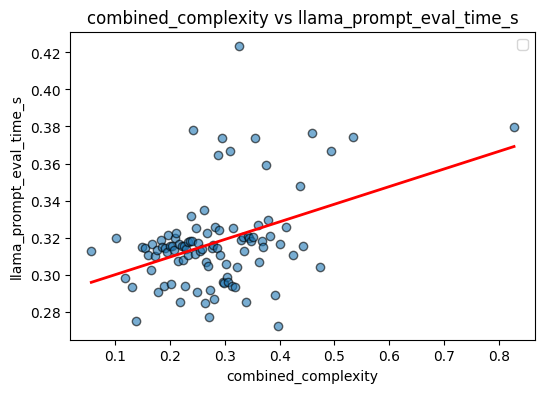

In [171]:
x = 'combined_complexity'
y = 'llama_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


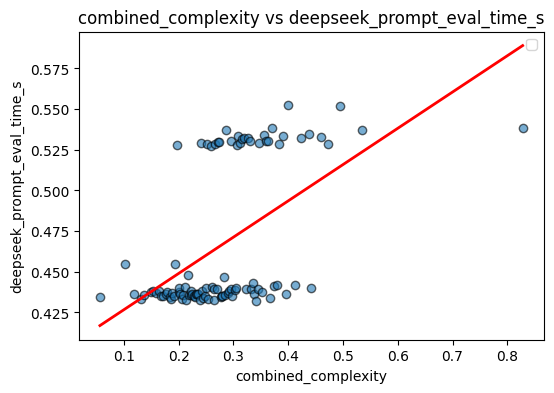

In [172]:
x = 'combined_complexity'
y = 'deepseek_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


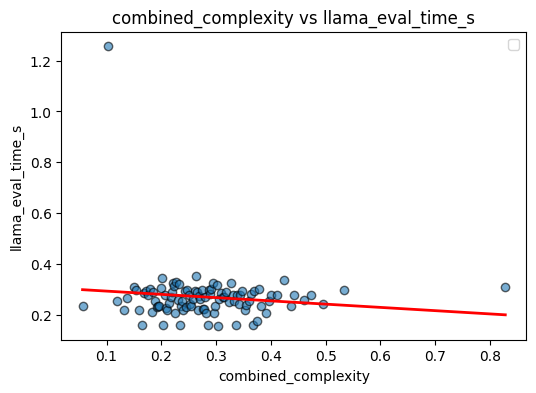

In [173]:
x = 'combined_complexity'
y = 'llama_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


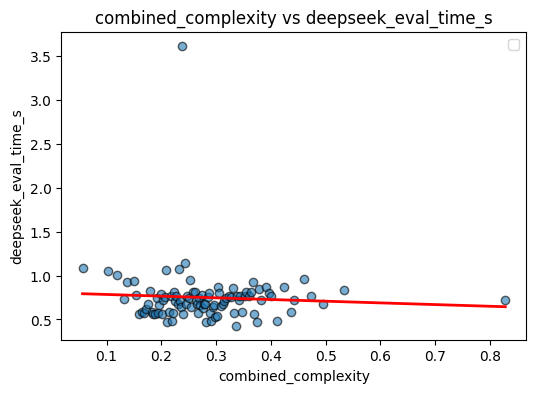

In [174]:
x = 'combined_complexity'
y = 'deepseek_eval_time_s'
plot_scatter(df, x, y)

We discard eval times

In [175]:
mcq_times = [
    'llama_prompt_eval_time_s',
    'deepseek_prompt_eval_time_s'
]
complexity_metrics = [
    'semantic_norm', 'grammatical_norm',
    'syntactic_norm', 'combined_complexity'
]

In [176]:
# A2: Univariate correlations
uni_corr = corr_table(df, complexity_metrics, mcq_times)
print("A2 – Univariate correlations:\n", uni_corr)

A2 – Univariate correlations:
              predictor                       target         r       p_value
0        semantic_norm     llama_prompt_eval_time_s  0.355101  2.886694e-04
1        semantic_norm  deepseek_prompt_eval_time_s  0.657278  1.107812e-13
2     grammatical_norm     llama_prompt_eval_time_s  0.335997  6.316324e-04
3     grammatical_norm  deepseek_prompt_eval_time_s  0.533510  1.095698e-08
4       syntactic_norm     llama_prompt_eval_time_s  0.274498  5.713858e-03
5       syntactic_norm  deepseek_prompt_eval_time_s  0.153893  1.263390e-01
6  combined_complexity     llama_prompt_eval_time_s  0.398169  4.085159e-05
7  combined_complexity  deepseek_prompt_eval_time_s  0.527547  1.704681e-08


In [177]:
# A3: Human-Judgment effects
hj_corr = corr_table(df, ['humanScore_norm', 'clarity_norm'], mcq_times)
print("A3 – Human-judgment correlations:\n", hj_corr)

A3 – Human-judgment correlations:
          predictor                       target         r   p_value
0  humanScore_norm     llama_prompt_eval_time_s -0.006533  0.948561
1  humanScore_norm  deepseek_prompt_eval_time_s -0.137966  0.171040
2     clarity_norm     llama_prompt_eval_time_s -0.075777  0.453662
3     clarity_norm  deepseek_prompt_eval_time_s -0.126958  0.208132


In [178]:
# Section B: Fact Response Time vs Complexity


In [179]:
# B1: Scatter plots: fact times vs combined complexity

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


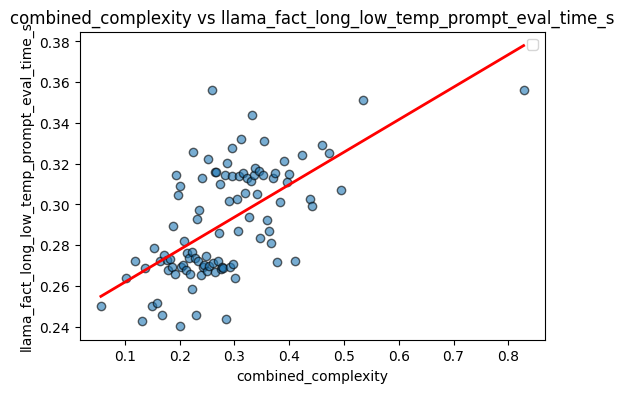

In [180]:
x = 'combined_complexity'
y = 'llama_fact_long_low_temp_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


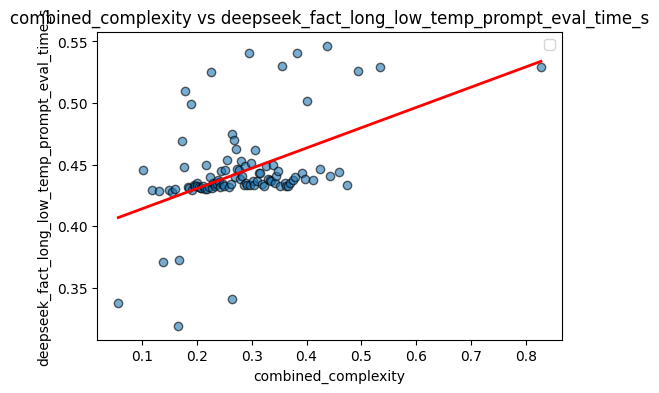

In [181]:
x = 'combined_complexity'
y = 'deepseek_fact_long_low_temp_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


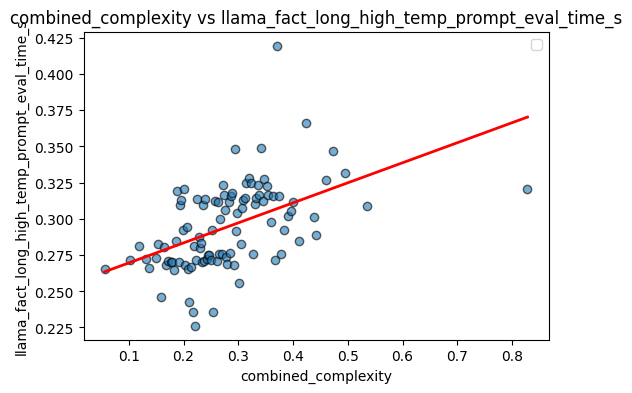

In [182]:
x = 'combined_complexity'
y = 'llama_fact_long_high_temp_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


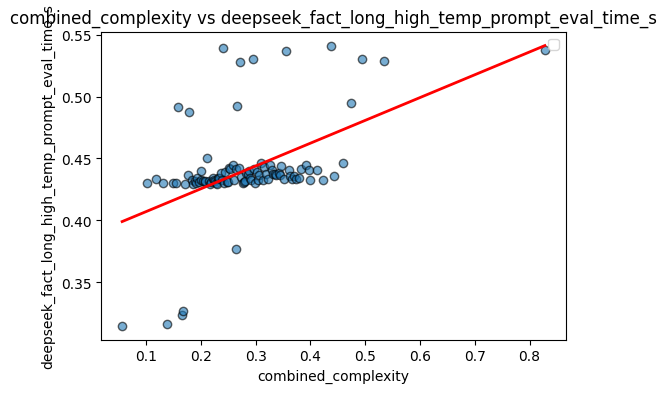

In [183]:
x = 'combined_complexity'
y = 'deepseek_fact_long_high_temp_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


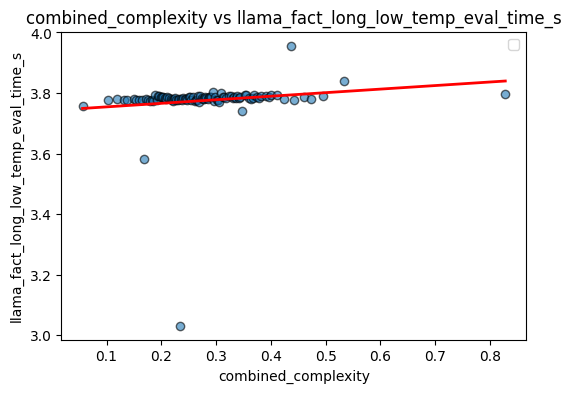

In [184]:
x = 'combined_complexity'
y = 'llama_fact_long_low_temp_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


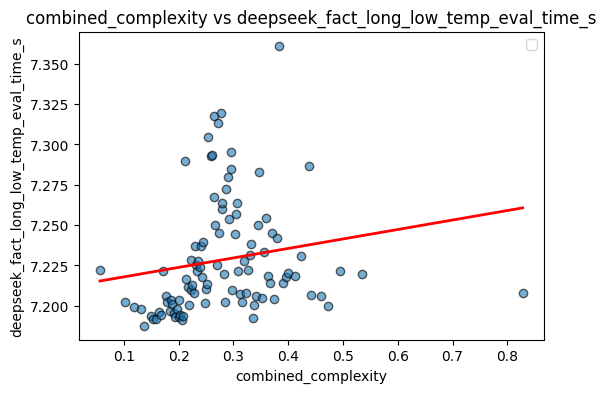

In [185]:
x = 'combined_complexity'
y = 'deepseek_fact_long_low_temp_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


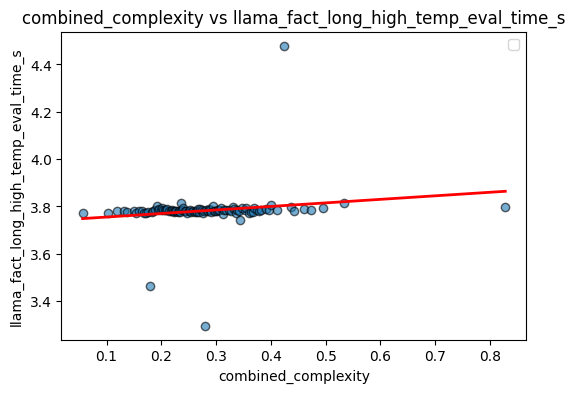

In [186]:
x = 'combined_complexity'
y = 'llama_fact_long_high_temp_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-170-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


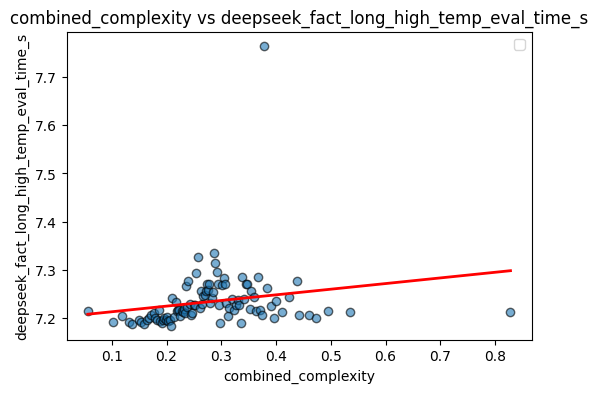

In [187]:
x = 'combined_complexity'
y = 'deepseek_fact_long_high_temp_eval_time_s'
plot_scatter(df, x, y)

In [188]:
fact_times = [
    'llama_fact_long_low_temp_prompt_eval_time_s',
    'deepseek_fact_long_low_temp_prompt_eval_time_s',
    'llama_fact_long_high_temp_prompt_eval_time_s',
    'deepseek_fact_long_high_temp_prompt_eval_time_s'
]

In [189]:
# B2: Univariate correlations
fact_corr = corr_table(df, complexity_metrics, fact_times)
print("B2 – Fact univariate correlations:\n", fact_corr)

B2 – Fact univariate correlations:
               predictor                                           target  \
0         semantic_norm      llama_fact_long_low_temp_prompt_eval_time_s   
1         semantic_norm   deepseek_fact_long_low_temp_prompt_eval_time_s   
2         semantic_norm     llama_fact_long_high_temp_prompt_eval_time_s   
3         semantic_norm  deepseek_fact_long_high_temp_prompt_eval_time_s   
4      grammatical_norm      llama_fact_long_low_temp_prompt_eval_time_s   
5      grammatical_norm   deepseek_fact_long_low_temp_prompt_eval_time_s   
6      grammatical_norm     llama_fact_long_high_temp_prompt_eval_time_s   
7      grammatical_norm  deepseek_fact_long_high_temp_prompt_eval_time_s   
8        syntactic_norm      llama_fact_long_low_temp_prompt_eval_time_s   
9        syntactic_norm   deepseek_fact_long_low_temp_prompt_eval_time_s   
10       syntactic_norm     llama_fact_long_high_temp_prompt_eval_time_s   
11       syntactic_norm  deepseek_fact_long_high_tem

We discard eval_time entries

In [190]:
# Section C: Model-to-Model Comparisons
df['delta_prompt_time'] = df['deepseek_prompt_eval_time_s'] - df['llama_prompt_eval_time_s']
deltas_corr = corr_table(df, complexity_metrics, ['delta_prompt_time'])
print("C1 – Δtime correlations:\n", deltas_corr)

C1 – Δtime correlations:
              predictor             target         r       p_value
0        semantic_norm  delta_prompt_time  0.483469  3.483075e-07
1     grammatical_norm  delta_prompt_time  0.363886  1.980108e-04
2       syntactic_norm  delta_prompt_time -0.001160  9.908601e-01
3  combined_complexity  delta_prompt_time  0.320420  1.153844e-03


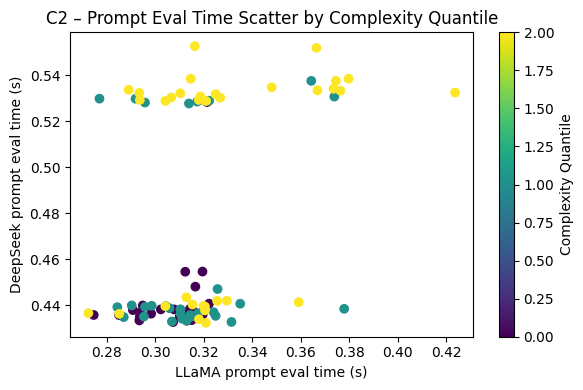

In [191]:
# C2: Scatter llama vs deepseek prompt eval times withing their combined complexity ranges
df['complexity_quantile'] = pd.qcut(df['combined_complexity'], 3, labels=False)
plt.figure(figsize=(6,4))
plt.scatter(df['llama_prompt_eval_time_s'], df['deepseek_prompt_eval_time_s'], c=df['complexity_quantile'], cmap='viridis')
plt.xlabel('LLaMA prompt eval time (s)')
plt.ylabel('DeepSeek prompt eval time (s)')
plt.title('C2 – Prompt Eval Time Scatter by Complexity Quantile')
plt.colorbar(label='Complexity Quantile')
plt.tight_layout()
plt.show()

In [192]:
# Section D: Accuracy vs Complexity
def logistic_summary(df, predictor, target):
    model = LogisticRegression()
    X = df[[predictor]].values
    y = df[target].values
    model.fit(X, y)
    y_score = model.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    return model.coef_[0][0], roc_auc


In [193]:
acc_results = []
for metric in complexity_metrics:
    coef, roc_auc = logistic_summary(df, metric, 'is_validated')
    acc_results.append({'metric': metric, 'coef': coef, 'auc': roc_auc})
acc_df = pd.DataFrame(acc_results)
print("D1 – Overall validation vs complexity:\n", acc_df)

D1 – Overall validation vs complexity:
                 metric      coef       auc
0        semantic_norm  0.230944  0.541538
1     grammatical_norm  0.218032  0.501099
2       syntactic_norm  0.770838  0.557582
3  combined_complexity  0.703657  0.570989


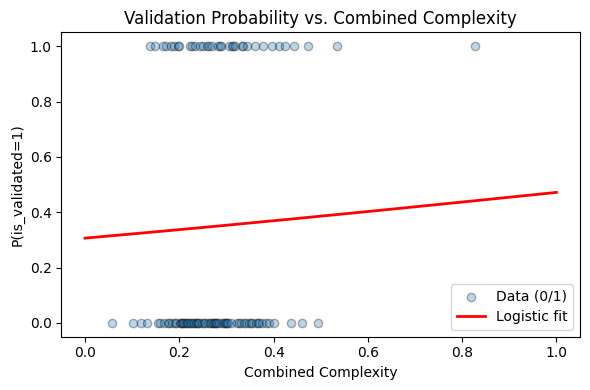

In [194]:
X = df['combined_complexity'].values.reshape(-1,1)
y = df['is_validated'].values

model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

x_vals = np.linspace(0, 1, 200).reshape(-1,1)
y_prob = model.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(6,4))
# scatter actual 0/1
plt.scatter(X, y, alpha=0.3, label='Data (0/1)', edgecolor='k')
# logistic curve
plt.plot(x_vals, y_prob, color='red', lw=2, label='Logistic fit')
plt.xlabel('Combined Complexity')
plt.ylabel('P(is_validated=1)')
plt.title('Validation Probability vs. Combined Complexity')
plt.legend()
plt.tight_layout()
plt.show()

In [195]:
# Per-model validation
for mod in ['llama', 'deepseek']:
    res = []
    for metric in complexity_metrics:
        coef, roc_auc = logistic_summary(df, metric, f'is_validated_{mod}')
        res.append({'metric': metric, 'coef': coef, 'auc': roc_auc})
    print(f"D2 – {mod.capitalize()} validation vs complexity:\n", pd.DataFrame(res))
    print()

D2 – Llama validation vs complexity:
                 metric      coef       auc
0        semantic_norm  0.190457  0.537621
1     grammatical_norm -0.162884  0.517444
2       syntactic_norm  0.008374  0.456284
3  combined_complexity  0.241187  0.516183

D2 – Deepseek validation vs complexity:
                 metric      coef       auc
0        semantic_norm  0.123650  0.528302
1     grammatical_norm  0.225385  0.514251
2       syntactic_norm  0.529399  0.534725
3  combined_complexity  0.560118  0.556002



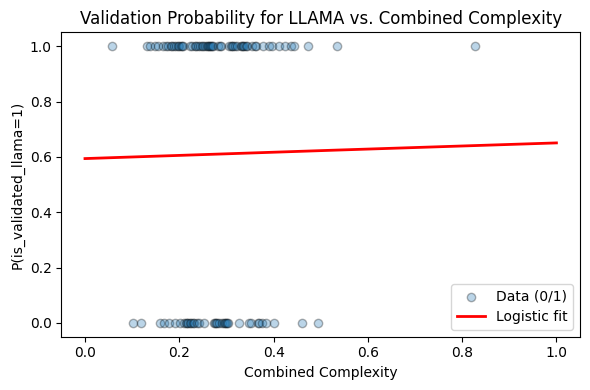

In [196]:
X = df['combined_complexity'].values.reshape(-1,1)
y = df['is_validated_llama'].values

model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

x_vals = np.linspace(0, 1, 200).reshape(-1,1)
y_prob = model.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(6,4))
# scatter actual 0/1
plt.scatter(X, y, alpha=0.3, label='Data (0/1)', edgecolor='k')
# logistic curve
plt.plot(x_vals, y_prob, color='red', lw=2, label='Logistic fit')
plt.xlabel('Combined Complexity')
plt.ylabel('P(is_validated_llama=1)')
plt.title('Validation Probability for LLAMA vs. Combined Complexity')
plt.legend()
plt.tight_layout()
plt.show()

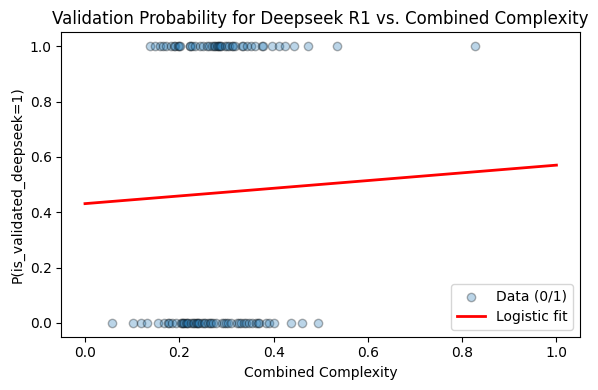

In [197]:
X = df['combined_complexity'].values.reshape(-1,1)
y = df['is_validated_deepseek'].values

model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

x_vals = np.linspace(0, 1, 200).reshape(-1,1)
y_prob = model.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(6,4))
# scatter actual 0/1
plt.scatter(X, y, alpha=0.3, label='Data (0/1)', edgecolor='k')
# logistic curve
plt.plot(x_vals, y_prob, color='red', lw=2, label='Logistic fit')
plt.xlabel('Combined Complexity')
plt.ylabel('P(is_validated_deepseek=1)')
plt.title('Validation Probability for Deepseek R1 vs. Combined Complexity')
plt.legend()
plt.tight_layout()
plt.show()

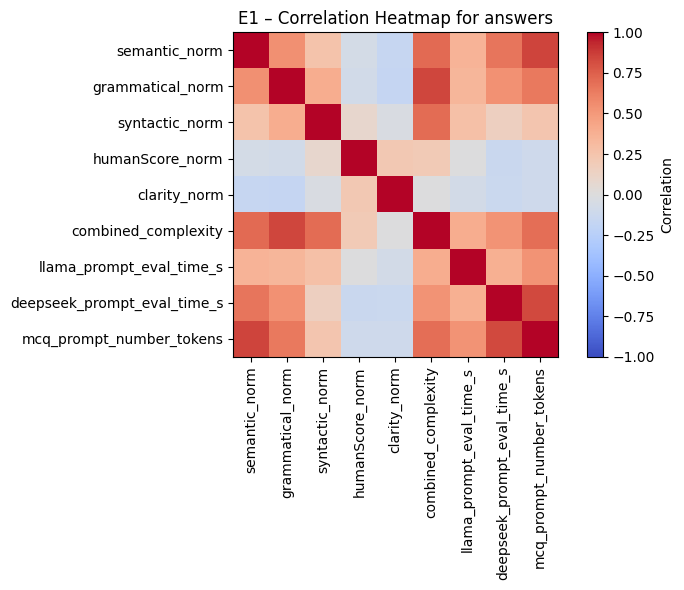

In [198]:
# Section E: Complexity Component Interactions for answers and number of tokens
all_feats = [
    'semantic_norm', 'grammatical_norm', 'syntactic_norm',
    'humanScore_norm', 'clarity_norm', 'combined_complexity'
] + mcq_times + ['mcq_prompt_number_tokens']
corr_mat = df[all_feats].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_mat, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(all_feats)), all_feats, rotation=90)
plt.yticks(range(len(all_feats)), all_feats)
plt.title('E1 – Correlation Heatmap for answers')
plt.tight_layout()
plt.show()


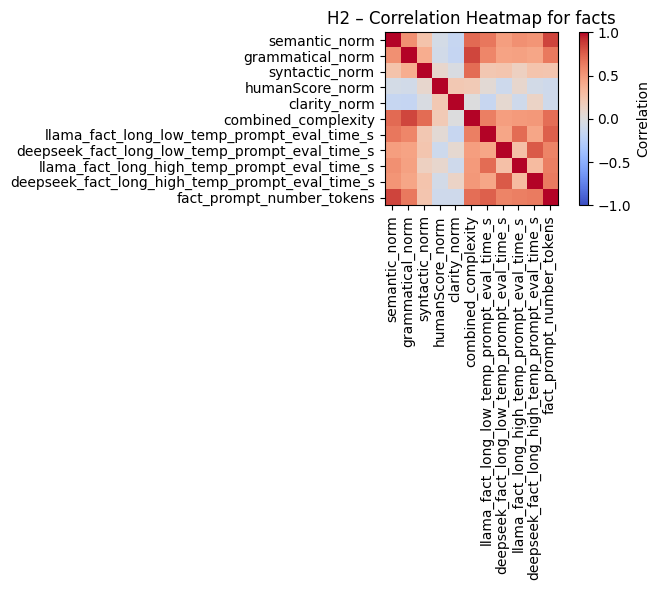

In [199]:
all_feats = [
    'semantic_norm', 'grammatical_norm', 'syntactic_norm',
    'humanScore_norm', 'clarity_norm', 'combined_complexity'
] + fact_times + ['fact_prompt_number_tokens']
corr_mat = df[all_feats].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_mat, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(all_feats)), all_feats, rotation=90)
plt.yticks(range(len(all_feats)), all_feats)
plt.title('H2 – Correlation Heatmap for facts')
plt.tight_layout()
plt.show()


In [200]:
# Section F: Bucketed & Quantile Analyses
df['complexity_decile'] = pd.qcut(df['combined_complexity'], 10, labels=False)
decile_stats = df.groupby('complexity_decile')[mcq_times].agg(['mean','std'])
print("F1 – Decile MCQ times:\n", decile_stats)


F1 – Decile MCQ times:
                   llama_prompt_eval_time_s            \
                                      mean       std   
complexity_decile                                      
0                                 0.305783  0.013832   
1                                 0.310578  0.010154   
2                                 0.309789  0.011614   
3                                 0.320791  0.022154   
4                                 0.311266  0.015448   
5                                 0.312529  0.024380   
6                                 0.314451  0.031005   
7                                 0.324464  0.036626   
8                                 0.321110  0.029729   
9                                 0.341731  0.030493   

                  deepseek_prompt_eval_time_s            
                                         mean       std  
complexity_decile                                        
0                                    0.438051  0.006049  
1              

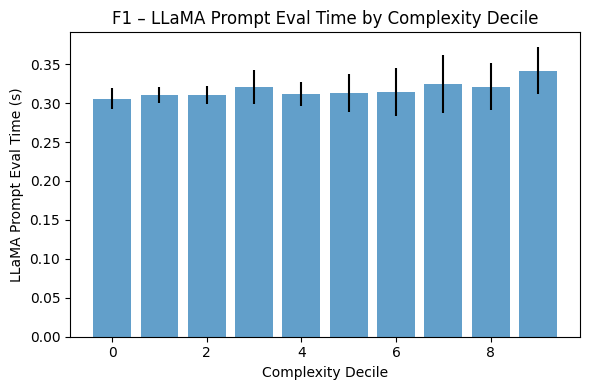

In [201]:

# Bar chart for llama_eval_time_s by decile
plt.figure(figsize=(6,4))
means = decile_stats['llama_prompt_eval_time_s']['mean']
stds  = decile_stats['llama_prompt_eval_time_s']['std']
plt.bar(range(10), means, yerr=stds, alpha=0.7)
plt.xlabel('Complexity Decile')
plt.ylabel('LLaMA Prompt Eval Time (s)')
plt.title('F1 – LLaMA Prompt Eval Time by Complexity Decile')
plt.tight_layout()
plt.show()


In [202]:
df['complexity_decile'] = pd.qcut(df['combined_complexity'], 10, labels=False)
decile_stats = df.groupby('complexity_decile')[fact_times].agg(['mean','std'])
print("F2 – Decile Fact times:\n", decile_stats)


F2 – Decile Fact times:
                   llama_fact_long_low_temp_prompt_eval_time_s            \
                                                         mean       std   
complexity_decile                                                         
0                                                    0.259479  0.012902   
1                                                    0.277292  0.021032   
2                                                    0.274828  0.013673   
3                                                    0.282406  0.024155   
4                                                    0.293128  0.031570   
5                                                    0.285099  0.025302   
6                                                    0.303246  0.022858   
7                                                    0.311276  0.015809   
8                                                    0.302488  0.019098   
9                                                    0.318124  0.024967   
